### Deep Feed Forward NN model results using company: Grendene (GRND3)

**DFF neural networks** opened pandora box of deep learning in early 90s. These are just FF NNs, but with more than one hidden layer. 

When training a traditional FF, we pass only a small amount of error to previous layer. Because of that stacking more layers led to exponential growth of training times, making DFFs quite impractical. Only in early 00s we developed a bunch of approaches that allowed to train DFFs effectively; now they form a core of modern Machine Learning systems, covering the same purposes as FFs, but with much better results.

<img src="./img/dff.png" alt="Drawing" style="width: 200px;"/>

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni
from keras.callbacks import EarlyStopping

x_csv_path = './data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = './data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)
es = EarlyStopping(monitor='val_loss', verbose=1, patience=50)

Using TensorFlow backend.


### 1) Deep Feed Forward NN

  80% train / 20% test / 0% validation split

**kernel_initializer:** random_uniform

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
<IPython.core.display.Image object>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

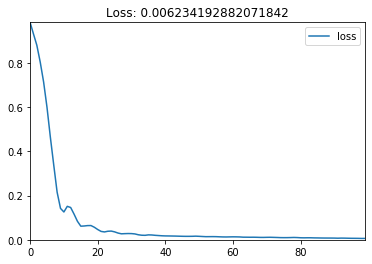

    Prediction      Real    % error
8     7.225009  8.491036  14.910154
0     6.836543  8.075241  15.339460
7     5.969874  5.156991  15.762754
9     4.766789  4.785659   0.394290
2     4.884486  4.616062   5.814998
1     4.209509  3.669486  14.716598
6     4.702406  3.491649  34.675795
3     2.430177  3.003443  19.086951
10    1.290262  1.377930   6.362357
5     1.407342  0.900556  56.274769
4     0.658868  0.667981   1.364285


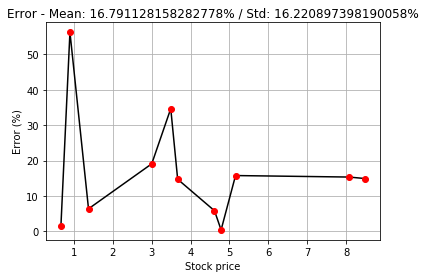

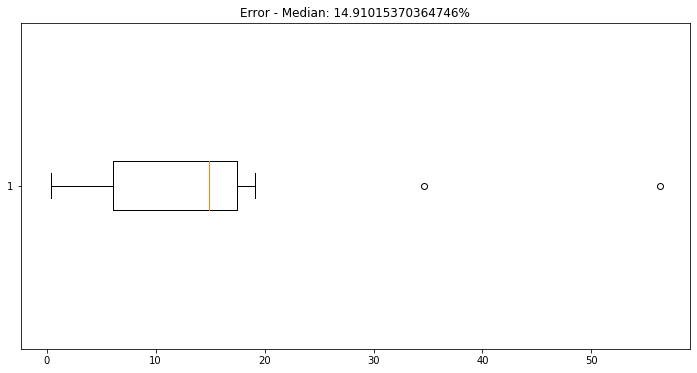

count    11.000000
mean     16.791128
std      16.220897
min       0.394290
25%       6.088678
50%      14.910154
75%      17.424852
max      56.274769
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.225009  8.491036  14.910154
0     6.836543  8.075241  15.339460
7     5.969874  5.156991  15.762754
9     4.766789  4.785659   0.394290
2     4.884486  4.616062   5.814998
1     4.209509  3.669486  14.716598
3     2.430177  3.003443  19.086951
10    1.290262  1.377930   6.362357
4     0.658868  0.667981   1.364285


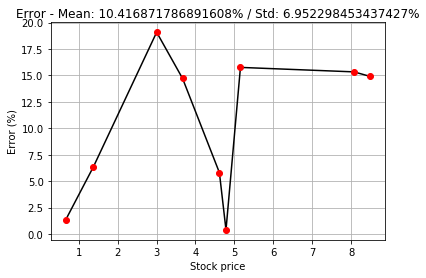

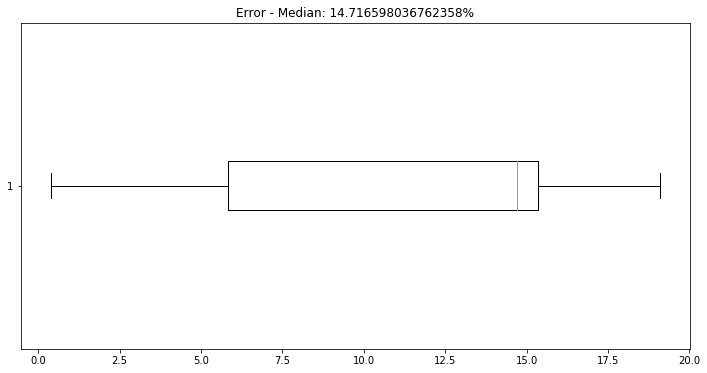

count     9.000000
mean     10.416872
std       6.952298
min       0.394290
25%       5.814998
50%      14.716598
75%      15.339460
max      19.086951
Name: % error, dtype: float64
MSE of training: 0.006457095881077376
MSE of testing: 0.09103095531463623
MSE of testing without first outliers: 0.08044996857643127


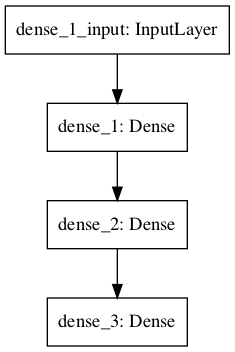

In [2]:
from keras.utils import plot_model
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, random_uniform, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=100, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler, model_name='DFF 1 | rnd | adam | relu')
plot_model(deep_model)

###  2) Deep Feed Forward NN with validation split

  <font color=red>72%</font> train / 20% test / <font color=red>8%</font> validation split
 
 **kernel_initializer:** random_uniform

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

**using EalryStopping to prevent from overfitting**

Epoch 00091: early stopping
<IPython.core.display.Image object>
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_5 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

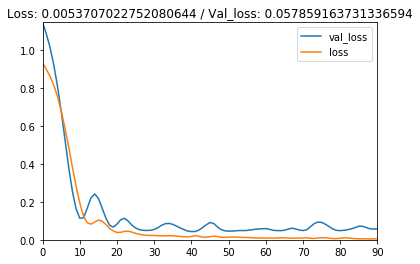

    Prediction      Real    % error
8     6.956083  8.491036  18.077336
0     7.116799  8.075241  11.868897
7     6.634557  5.156991  28.651722
9     4.463427  4.785659   6.733279
2     5.003352  4.616062   8.390039
1     4.097865  3.669486  11.674081
6     4.636933  3.491649  32.800661
3     2.409657  3.003443  19.770174
10    1.559904  1.377930  13.206273
5     1.544819  0.900556  71.540493
4     0.902655  0.667981  35.131889


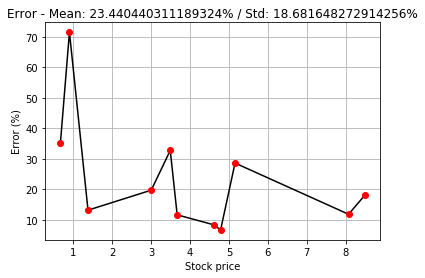

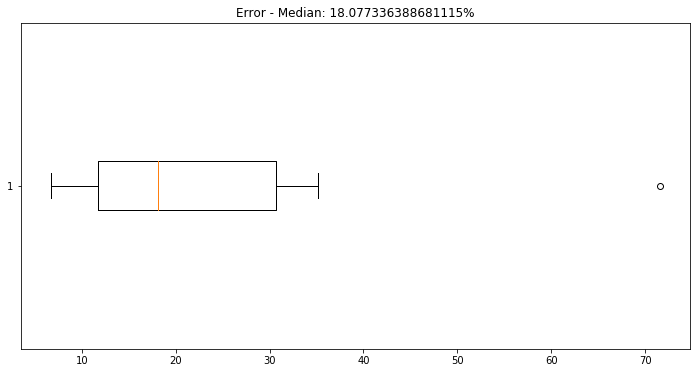

count    11.000000
mean     23.440440
std      18.681648
min       6.733279
25%      11.771489
50%      18.077336
75%      30.726191
max      71.540493
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     6.956083  8.491036  18.077336
0     7.116799  8.075241  11.868897
7     6.634557  5.156991  28.651722
9     4.463427  4.785659   6.733279
2     5.003352  4.616062   8.390039
1     4.097865  3.669486  11.674081
6     4.636933  3.491649  32.800661
3     2.409657  3.003443  19.770174
10    1.559904  1.377930  13.206273
4     0.902655  0.667981  35.131889


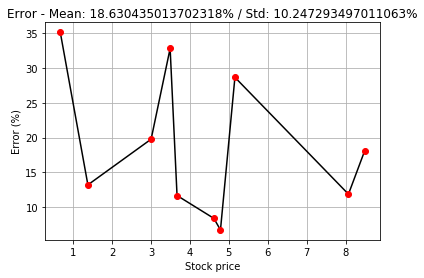

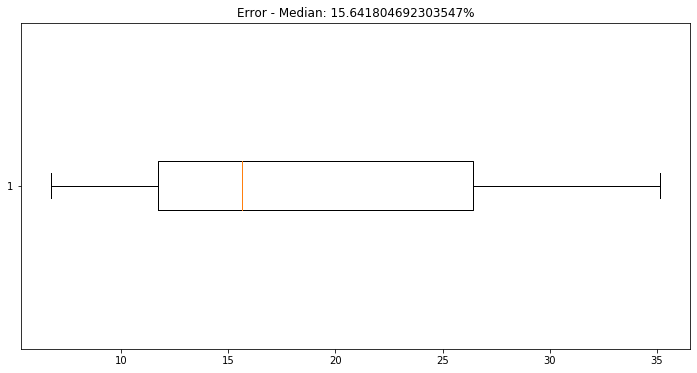

count    10.000000
mean     18.630435
std      10.247293
min       6.733279
25%      11.722785
50%      15.641805
75%      26.431335
max      35.131889
Name: % error, dtype: float64
MSE of training: 0.015950913456353275
MSE of testing: 0.11797761172056198
MSE of testing without first outliers: 0.12309447675943375


In [3]:
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, random_uniform, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='DFF 2 | rnd | adam | relu | cv', val=True, existing_df=result_df)

### 3) Deep Feed Forward NN, with glorot normal

  <font color=red>80%</font> train / 20% test / <font color=red>0%</font> validation split

**kernel_initializer:** <font color=red>glorot_normal</font>

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE


## <font color=green>Best model</font>
 <font color=green>Loss: 0.00077696</font>
 
 <font color=green>MSE of testing: 0.11408524960279465</font>
 
 <font color=green>-- Error on test set --</font>
 
 <font color=green>1st Quartile: 9.64%</font>  |  <font color=green>Median: 13.44%</font>  |  <font color=green>3rd Quartile: 17.46%</font>

<IPython.core.display.Image object>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_8 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

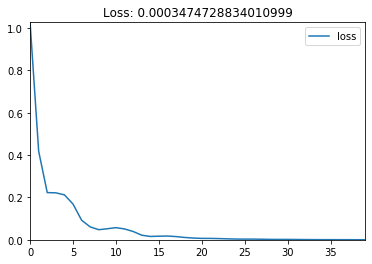

    Prediction      Real     % error
8     7.434866  8.491036   12.438642
0     6.857208  8.075241   15.083546
7     5.469318  5.156991    6.056386
9     4.234366  4.785659   11.519686
2     5.178963  4.616062   12.194396
1     2.894090  3.669486   21.130915
6     3.713751  3.491649    6.360953
3     2.866099  3.003443    4.572894
10    1.325194  1.377930    3.827258
5     2.359431  0.900556  161.997000
4    -0.601700  0.667981  190.077370


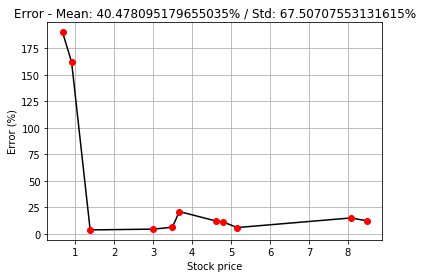

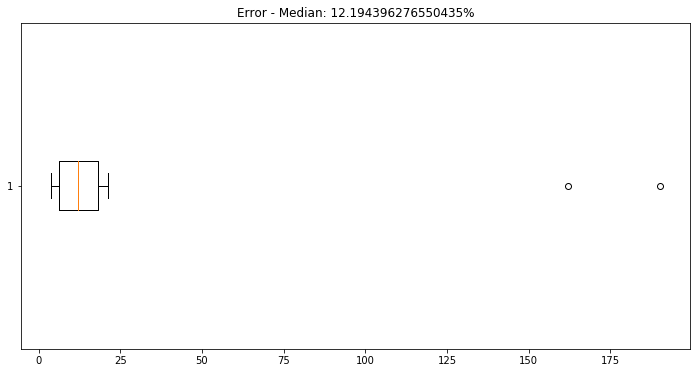

count     11.000000
mean      40.478095
std       67.507076
min        3.827258
25%        6.208670
50%       12.194396
75%       18.107231
max      190.077370
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.434866  8.491036  12.438642
0     6.857208  8.075241  15.083546
7     5.469318  5.156991   6.056386
9     4.234366  4.785659  11.519686
2     5.178963  4.616062  12.194396
1     2.894090  3.669486  21.130915
6     3.713751  3.491649   6.360953
3     2.866099  3.003443   4.572894
10    1.325194  1.377930   3.827258


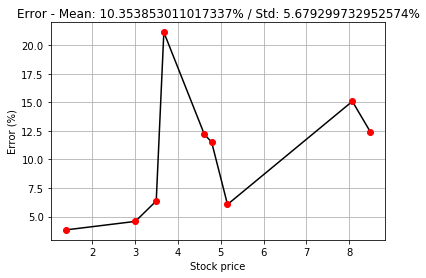

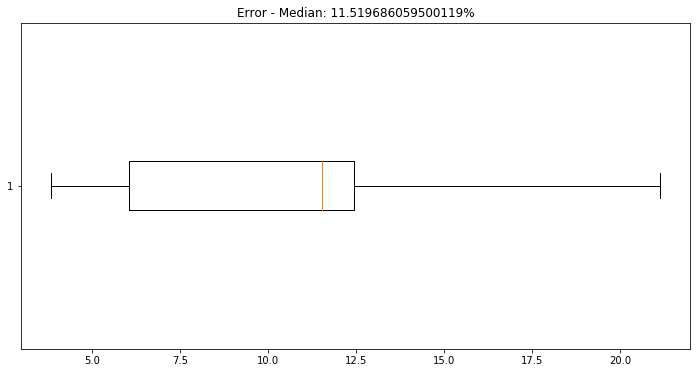

count     9.000000
mean     10.353853
std       5.679300
min       3.827258
25%       6.056386
50%      11.519686
75%      12.438642
max      21.130915
Name: % error, dtype: float64
MSE of training: 0.00034603222659577364
MSE of testing: 0.11310935020446777
MSE of testing without first outliers: 0.0713510811328888


In [4]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler,
                         model_name='DFF 3 | glorot_normal | adam | relu', existing_df=result_df)

### 4) Deep Feed Forward NN, with glorot normal and validation split

  <font color=red>72%</font> train / 20% test / <font color=red>8%</font> validation split

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Epoch 00060: early stopping
<IPython.core.display.Image object>
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_11 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

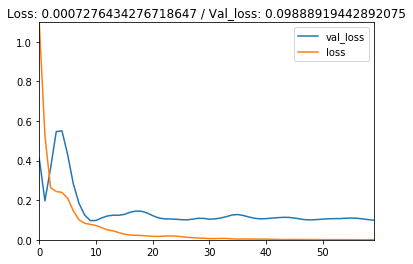

    Prediction      Real     % error
8     6.795405  8.491036   19.969655
0     6.915106  8.075241   14.366570
7     6.235980  5.156991   20.922850
9     3.983968  4.785659   16.751952
2     5.737801  4.616062   24.300773
1     2.813461  3.669486   23.328188
6     4.024334  3.491649   15.255987
3     2.710854  3.003443    9.741790
10    1.021180  1.377930   25.890308
5     2.473822  0.900556  174.699296
4    -0.335555  0.667981  150.234242


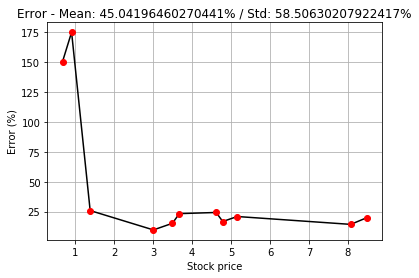

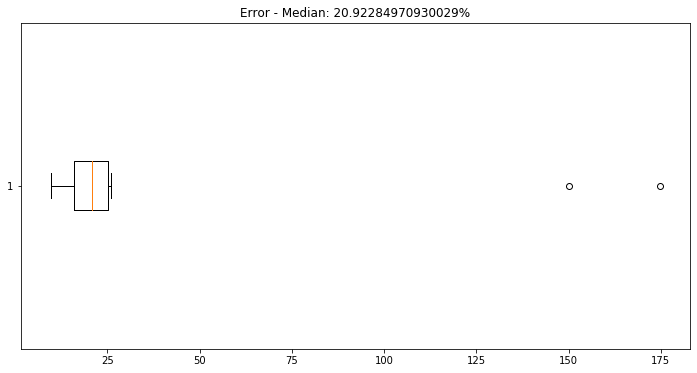

count     11.000000
mean      45.041965
std       58.506302
min        9.741790
25%       16.003970
50%       20.922850
75%       25.095541
max      174.699296
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     6.795405  8.491036  19.969655
0     6.915106  8.075241  14.366570
7     6.235980  5.156991  20.922850
9     3.983968  4.785659  16.751952
2     5.737801  4.616062  24.300773
1     2.813461  3.669486  23.328188
6     4.024334  3.491649  15.255987
3     2.710854  3.003443   9.741790
10    1.021180  1.377930  25.890308


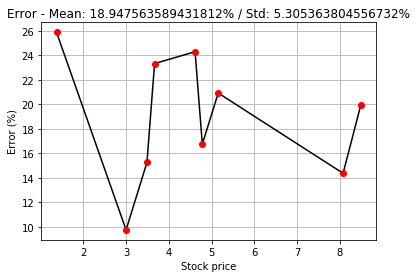

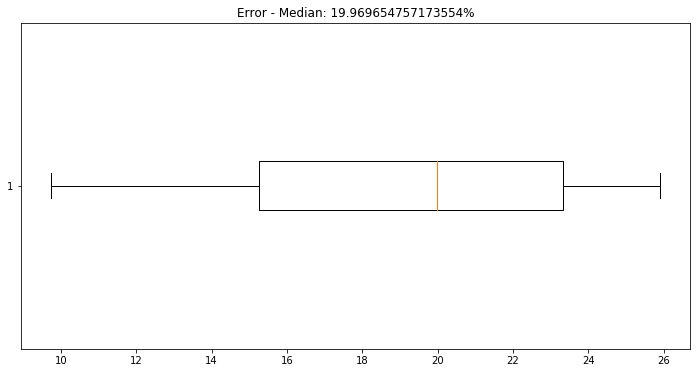

count     9.000000
mean     18.947564
std       5.305364
min       9.741790
25%      15.255987
50%      19.969655
75%      23.328188
max      25.890308
Name: % error, dtype: float64
MSE of training: 0.020831084810197353
MSE of testing: 0.1755593866109848
MSE of testing without first outliers: 0.15229572355747223


In [5]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='DFF 4 | glorot_normal | adam | relu | cv', val=True, existing_df=result_df)

### 5) Deep Feed Forward NN, with glorot uniform

  <font color=red>80%</font> train / 20% test / <font color=red>0%</font> validation split
  
  **kernel_initializer:** <font color=red>glorot_uniform</font>

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

<IPython.core.display.Image object>
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_14 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

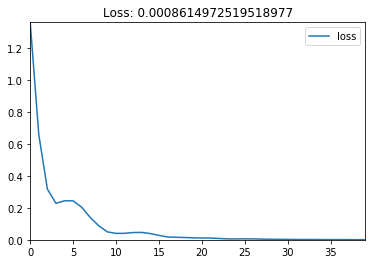

    Prediction      Real    % error
8     7.232950  8.491036  14.816634
0     6.205698  8.075241  23.151538
7     5.973761  5.156991  15.838112
9     4.652539  4.785659   2.781645
2     4.760562  4.616062   3.130377
1     4.838436  3.669486  31.855968
6     4.362811  3.491649  24.949865
3     3.200194  3.003443   6.550854
10    0.775284  1.377930  43.735598
5     1.305118  0.900556  44.923525
4     1.125835  0.667981  68.542997


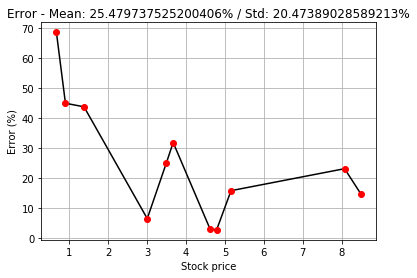

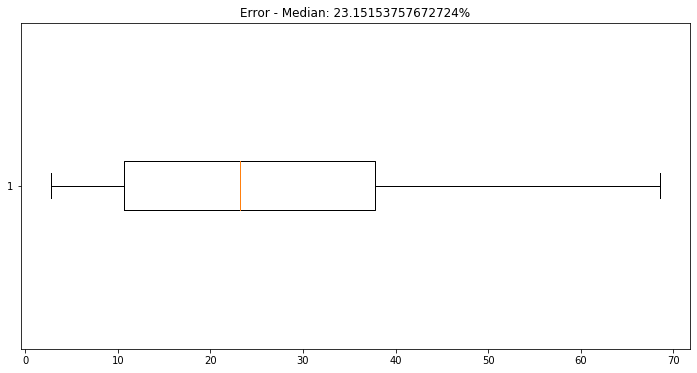

count    11.000000
mean     25.479738
std      20.473890
min       2.781645
25%      10.683744
50%      23.151538
75%      37.795783
max      68.542997
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.232950  8.491036  14.816634
0     6.205698  8.075241  23.151538
7     5.973761  5.156991  15.838112
9     4.652539  4.785659   2.781645
2     4.760562  4.616062   3.130377
1     4.838436  3.669486  31.855968
6     4.362811  3.491649  24.949865
3     3.200194  3.003443   6.550854
10    0.775284  1.377930  43.735598
5     1.305118  0.900556  44.923525
4     1.125835  0.667981  68.542997


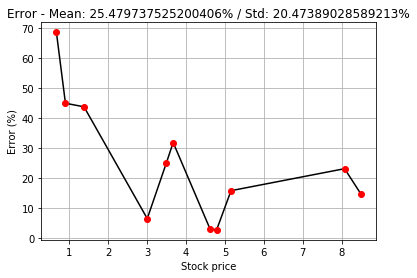

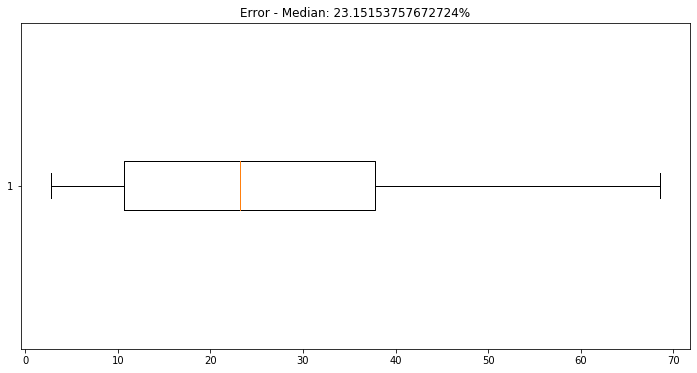

count    11.000000
mean     25.479738
std      20.473890
min       2.781645
25%      10.683744
50%      23.151538
75%      37.795783
max      68.542997
Name: % error, dtype: float64
MSE of training: 0.0007928311348554086
MSE of testing: 0.12707161903381348
MSE of testing without first outliers: 0.12707161903381348


In [6]:
# Keras Initializer with seed
glorot_uniform = gl_uni(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler,
                         model_name='DFF 5 | glorot_uniform | adam | relu', existing_df=result_df)

### 6) Deep Feed Forward NN, with glorot uniform and validation split

  <font color=red>72%</font> train / 20% test / <font color=red>8%</font> validation split
 
 **kernel_initializer:** glorot_uniform

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Epoch 00075: early stopping
<IPython.core.display.Image object>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 84)                4788      
_________________________________________________________________
dense_17 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

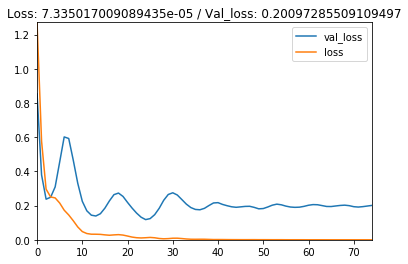

    Prediction      Real     % error
8     7.551121  8.491036   11.069500
0     6.989200  8.075241   13.449026
7     7.780602  5.156991   50.874852
9     4.305817  4.785659   10.026669
2     5.709571  4.616062   23.689209
1     4.601636  3.669486   25.402755
6     4.299760  3.491649   23.144120
3     2.916235  3.003443    2.903591
10    1.412168  1.377930    2.484682
5     1.203357  0.900556   33.623773
4     1.410022  0.667981  111.087179


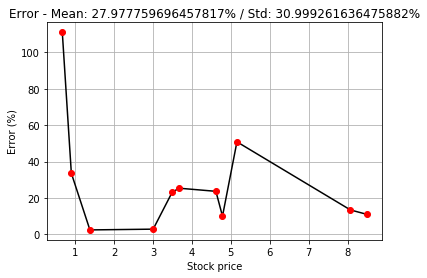

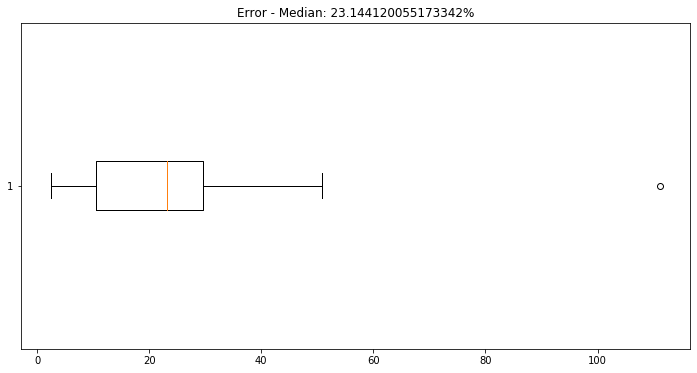

count     11.000000
mean      27.977760
std       30.999262
min        2.484682
25%       10.548084
50%       23.144120
75%       29.513264
max      111.087179
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.551121  8.491036  11.069500
0     6.989200  8.075241  13.449026
7     7.780602  5.156991  50.874852
9     4.305817  4.785659  10.026669
2     5.709571  4.616062  23.689209
1     4.601636  3.669486  25.402755
6     4.299760  3.491649  23.144120
3     2.916235  3.003443   2.903591
10    1.412168  1.377930   2.484682
5     1.203357  0.900556  33.623773


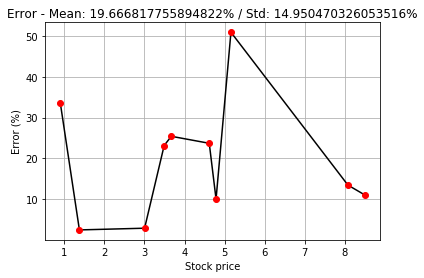

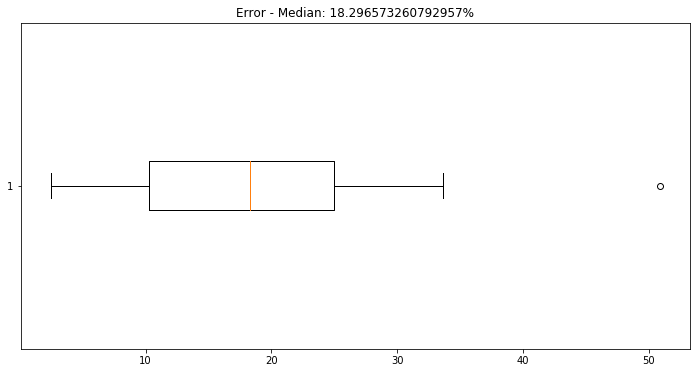

count    10.000000
mean     19.666818
std      14.950470
min       2.484682
25%      10.287377
50%      18.296573
75%      24.974369
max      50.874852
Name: % error, dtype: float64
MSE of training: 0.04116917332232168
MSE of testing: 0.18356847763061523
MSE of testing without first outliers: 0.19306263327598572


In [7]:
# Keras Initializer with seed
glorot_uniform = gl_uni(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model_with_val = tcc_utils.deep_model(x_train, glorot_uniform, layers, activations)
# Fit model
deep_history_with_val = deep_model_with_val.fit(x_train, y_train, epochs=1000,
                                                validation_split=0.2, verbose=0, callbacks=[es])
# Evaluating model
result_df = tcc_utils.evaluate_model(deep_model_with_val, deep_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler,
                         model_name='DFF 6 | glorot_uniform | adam | relu | cv', val=True, existing_df=result_df)

In [8]:
import pandas as pd

df = pd.read_csv('./results/results.csv', index_col=0)
final = df.append(result_df, ignore_index=True)
final.to_csv(r'./results/results.csv')

In [9]:
result_df.sort_values(by='Testing MSE after removing outlier')

,Model Name,Testing MSE,Testing MSE after removing outlier,Training MSE
2,DFF 3 | glorot_normal | adam | relu,0.113109,0.071351,0.000346
0,DFF 1 | rnd | adam | relu,0.091031,0.080450,0.006457
1,DFF 2 | rnd | adam | relu | cv,0.117978,0.123094,0.015951
4,DFF 5 | glorot_uniform | adam | relu,0.127072,0.127072,0.000793
3,DFF 4 | glorot_normal | adam | relu | cv,0.175559,0.152296,0.020831
5,DFF 6 | glorot_uniform | adam | relu | cv,0.183568,0.193063,0.041169
